
## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

link to dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [1]:
# Import our wrangling and visualization library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("data/marketing_campaign.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

## The Goal is to study the behaviour of the Customers against the Wine Product


<div class="alert alert-block alert-warning">
Since the problem statement is all about modifying the company product to its target customer. I will be working one of the products the company sells which is WineProduct. So my EDA and Modelling will be about the behaviour of the customers to this particular product.
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Content Attributes

## People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

## Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# MntWines

The product we will be observing is the MntWines features. We want to look at some trends of customer behaviour to this particular product so maybe we can uncover some pattern

In [4]:
df["MntWines"].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

## Year Vs MntWines

We will be exploring the first feature in the dataset.**Year of birth**. So we can see those people who tend spend more money on wines for the past two years. 

In [5]:
df["Year_Birth"].nunique()

59

We have 59 unique year of birth in the dataset let's explore the minimum year of birth and the maximum year of birth

In [6]:
df["Year_Birth"].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

What I will do is to convert the Year of birth feature into their corresponding age so that i can either change them into a categorical feature or explore the age column as it is.

In [7]:
from datetime import date

In [8]:
def convert_age(year_birth):
    today = date.today()
    age = today.year - year_birth
    return age

In [9]:
df["Age"] = df["Year_Birth"].apply(convert_age)

Now that's done look at the numerical summary of the feature 

In [10]:
df["Age"].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

The Minimum age of the customer who patronizesis 26 while the maximum number of age that patronizes the company is 129 

Let's look at the distribution of the age feature

In [11]:
import plotly.express as px

In [12]:
fig = px.histogram(
    df["Age"],
    title = "Distribution of Age of Customers in the Company",
    nbins=50
)
fig.update_layout(
    xaxis_title = "Age of Customer",
    yaxis_title = "Frequency")

fig.show()

We can see from the above visualization that most of the company's customers age are clustered around 40 to 60. That i.e the most of the company's customers are within the age of 40 to 60

## Age and MntWines

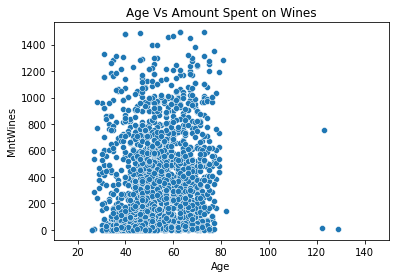

In [13]:
sns.scatterplot(x = "Age", y = "MntWines", data=df)
plt.title("Age Vs Amount Spent on Wines")
plt.xlim(10, 150);

From the visualization there is a trend in the dataset. The conclusion are thus:
* If the company were to target the customer based on two cluster we can deduce that customers around the age of 20-80 are the ones who will want to purchase any wines advertised by the company. While few of people around 100 above may not want to.

Let's try converting the Age feature into a categorical data maybe we can uncover more pattern. I will be converting Age in the range of 20, i.e 21-40, 41-60, 61-80 etc.

In [14]:
def convert_age(age):
    if age in range(21, 41):
        return "21-40"
    elif age in range(41, 61):
        return "41-60"
    elif age in range(61, 81):
        return "61-80"
    elif age in range(81, 101):
        return "81-100"
    elif age in range(101, 121):
        return "101-120"
    elif age in range(121, 141):
        return "121-140"
df["Age Range"] = df["Age"].apply(convert_age)

In [15]:
graph_order ={
    "21-40":1,
    "41-60":2,
    "61-80":3,
    "81-100":4,
    "121-140":5
}

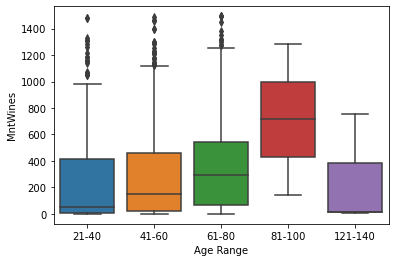

In [16]:
sns.boxplot(x="Age Range", y="MntWines", data=df, order=graph_order);

Another trend discovered is that people within the age range of 61-80 spent way more on the amount of wines for the last two years. We decided not to pick customers in the range of 81-100 (the total number of people that belong to that categories are just two)

# Conclusion for the Age Feature

If we are to be based on two clusters we can  form a clusters around people between the age of 20-80 and 81 above. However other than that it can be difficult to delve more though our model can help us achieve that, but my take on this is using age to suggest if customers will buy wines may still come into play if we are to divide them into 2 clusters.

## Education Vs MntWines

In [17]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

We have to group the Education level into two categories (The Graduate Level and the Undergraduate).


In [18]:
df["Education"].replace(["Graduation", "PhD", "Master", "2n Cycle"], "Graduate", inplace=True)
df["Education"].replace("Basic", "Undergraduate", inplace=True)

In [19]:
df["Education"].unique()

array(['Graduate', 'Undergraduate'], dtype=object)

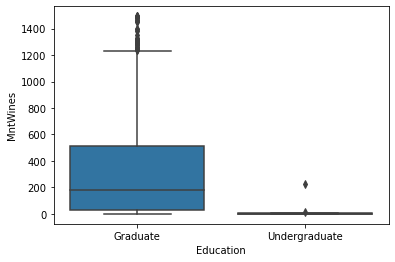

In [20]:
sns.boxplot(x="Education", y="MntWines", data=df);

We can observe that there is a strong correlation between education level and the amount of wine purchased in the previous two years. We may hypothesize that if we create a customer segmentation based on two clusters.  This feature will definitely help us target our customers

## Marital Status and MntWines

In [21]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Let's group this feature into two categories Married and Single

In [22]:
df["Marital_Status"].replace(["Together", "Married"], "Married", inplace=True)
df["Marital_Status"].replace(["Single", "Absurd", "YOLO", "Widow", "Alone", "Divorced"], "Single", inplace=True)

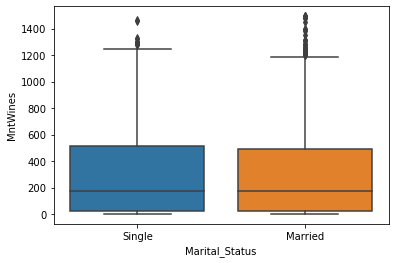

In [23]:
sns.boxplot(x="Marital_Status", y="MntWines", data=df);

There is a balance between the Marital Status, so the Education Level Still stands as a good feature to recommend maybe a customer will buy another Wines product when advertised to them

## Income VS MntWines

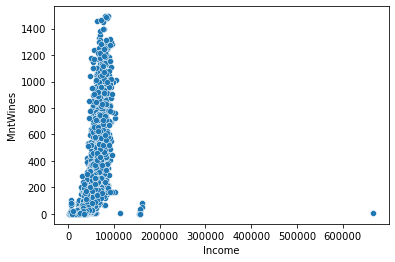

In [24]:
sns.scatterplot(x="Income", y="MntWines", data=df);

We have some outliers that is not making us understand how the trends are going, but we can see a trend that as the income of a customer increases so the the amount spent on wine increases. Let's perform some mask on the income feature, so that we can better visualize the relationship of the income feature

In [25]:
mask = df[df["Income"] < 150e3]

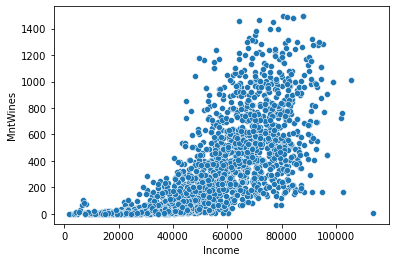

In [26]:
sns.scatterplot(x="Income", y="MntWines", data=mask);

There is a correaltion between the income and the amount spent on wines over the last two years, i.e as the income increases so do the amount spent on wines, but we need to know those group of people who earn so little so we can base our cluster on that

Let's Visualize the relationship between Age group, Income and Amount spent on wines

## Age VS Income VS MntWines

We will be masking our Income also due to outliers

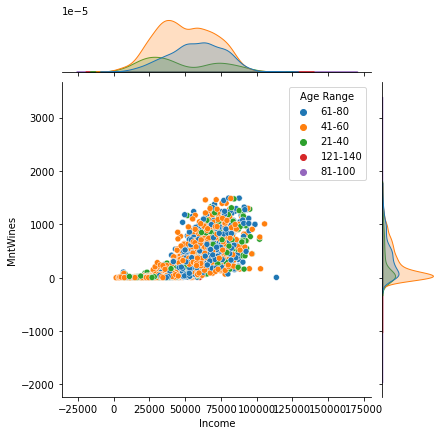

In [27]:
sns.jointplot(x = "Income", y="MntWines", hue="Age Range", data=mask);

The Age feature does not help us determine the customers who purchase low amount of wines for the last two years. Let's consider another feature

## Marital Status VS Income VS MntWines

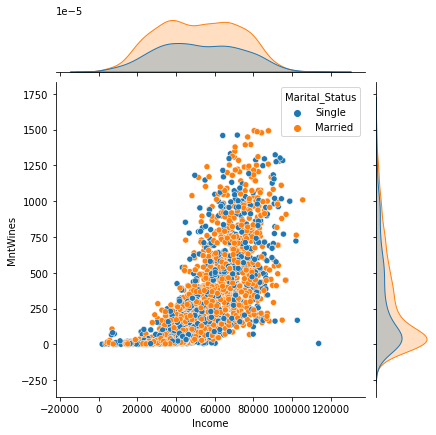

In [28]:
sns.jointplot(x = "Income", y="MntWines", hue="Marital_Status", data=mask);

The Marital Status Feature did not help us determine those groups as well. Let consider the Education Feature, since we said at first that it is good predictor in the previous EDA

## Education VS income VS MntWines

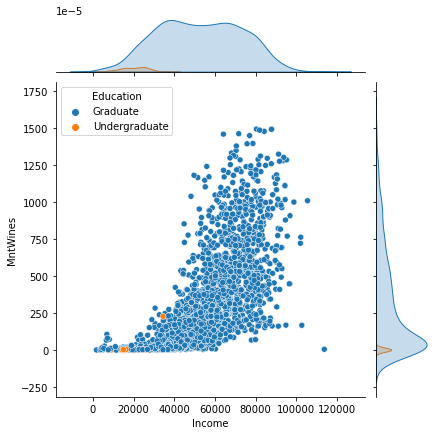

In [29]:
sns.jointplot(x = "Income", y="MntWines", hue="Education", data=mask);

This visualization has two assumptions.
* We discovered that individuals who earn the least in our clients are those with a undergraduate level of education, and as a result, they don't spend much on wine consumption.
* In general, without considering client segments. We can see that when a customer's income rises, so does their desire to purchase wines. So, for the Wine product income is undoubtedly one of the most important factors to consider.

As of now, we have two features that can be used to segment customers for the product wine: income and education.

Let's continue to explore more before we come into final conclusion

## Kid At Home Vs Mnt Wines

In [30]:
df["Kidhome"].unique()

array([0, 1, 2], dtype=int64)

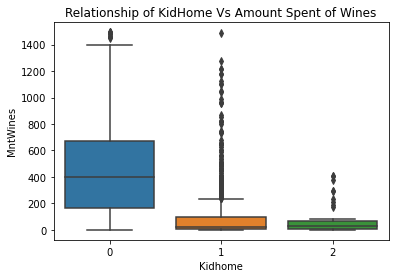

In [31]:
sns.boxplot(x = "Kidhome", y="MntWines", data=df)
plt.title("Relationship of KidHome Vs Amount Spent of Wines");

The Kid At Home feature is another feature to evaluate, as we can see from the above visualization that those customers who spend the most money on wine are those who do not have children. Let's visualize this relationship with our Income feature to see if we can see any trends.

## Kid At Home Vs Mnt Wines Vs Income

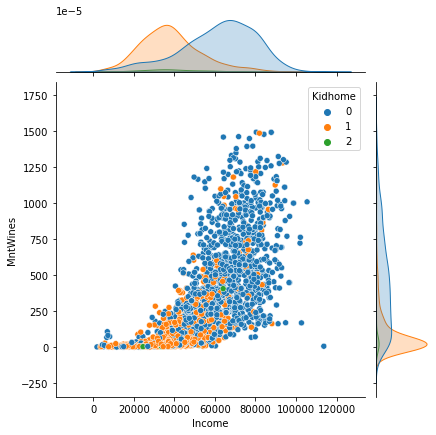

In [32]:
sns.jointplot(x = "Income", y="MntWines", hue="Kidhome", data=mask, palette="tab10");

We can see from the above visualization that customers who do not have children at home tend to earn more in our customers. So far, we have three features to consider for the Wine product: income, kidhome, and educational level.

## TeenHome Vs Amount of Wines

In [33]:
df["Teenhome"].unique()

array([0, 1, 2], dtype=int64)

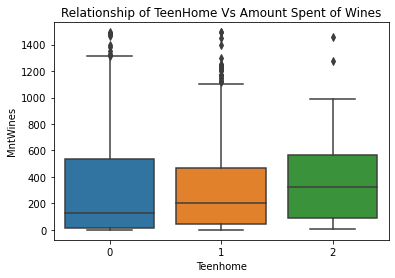

In [34]:
sns.boxplot(x = "Teenhome", y="MntWines", data=df)
plt.title("Relationship of TeenHome Vs Amount Spent of Wines");

There is a bit balance with Teen at home feature and the amount spent on wines, so we might not want to consider it, but let's visualize it with our income feature first.

## Teen At Home Vs Mnt Wines Vs Income

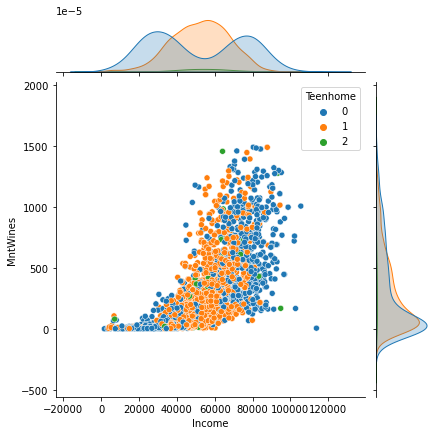

In [35]:
sns.jointplot(x = "Income", y="MntWines", hue="Teenhome", data=mask, palette="tab10");

As we've said earlier this feature has a balance so we won't be considering it.

## Date Joined Vs Amount Spent on Wine

In [36]:
df["Dt_Customer"].nunique()

663

Let's extract the year each customer joined to see if we can see a trend with it.

In [37]:
from datetime import datetime

# Function to convert string to datetime
def extract_year(date):
    
    format = "%d-%m-%Y"
    datetime_str = datetime.strptime(date, format)
    
    return datetime_str.year

df["Year Joined"] = df["Dt_Customer"].apply(extract_year)

In [38]:
df["Year Joined"].unique()

array([2012, 2014, 2013], dtype=int64)

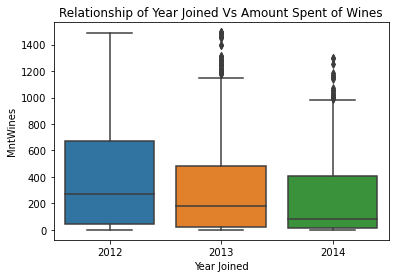

In [39]:
sns.boxplot(x = "Year Joined", y="MntWines", data=df)
plt.title("Relationship of Year Joined Vs Amount Spent of Wines");

The Year joined by each customer communicates some insights to us, as we can see that customers who have joined since 2012 have much more tendencies to buy the wines than those who joined in 2014, which tells us that old customers tend to patronize more than new customers, so we will incorporate it into our existing features.

## Recency Vs MntWines

Recency means number of days since customer last purchase

In [40]:
df["Recency"].dtype

dtype('int64')

In [41]:
df["Recency"].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

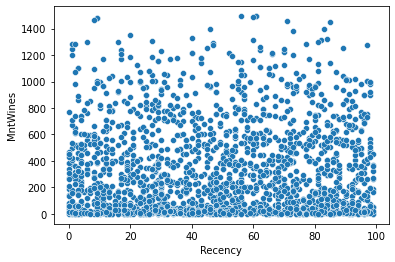

In [42]:
sns.scatterplot(x="Recency", y="MntWines", data=df);

We won't be using this feature because it doesn't communicate anything concerning the amount of wines bought by customer

## Complain Vs MntWines

In [43]:
df["Complain"].unique()

array([0, 1], dtype=int64)

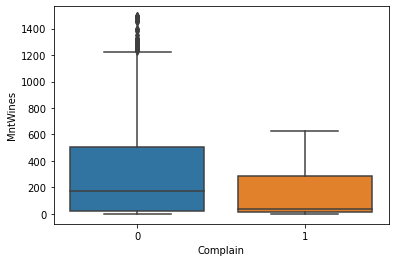

In [44]:
sns.boxplot(x="Complain", y="MntWines", data=df);

There is a relationship between customers who complain and the amount of Wines they bought so we will be including this feature as well

# Conclusion

So, based on our EDA, we might say that if a company were to market a new wine product to its customers. They should target each segment of customers based on the following:
* The customer Education background (Either graduate or Under graduate) -- Customers With Graduate level of education tends to buy more wines as this affect their income (i.e they tend to earn more money)
* The income of each customers (Customer who earn much tends to buy Wines)
* Age Feature: Customers below 100 years tends to Buy wines
* Kidhome: Whether a customer has kid or not: Customer who don't have kid buy wines a lot: This could be because maybe wines could intoxicate thier children.
* Date Customer joined. Old customers tend to patronize the company
* Whether a customer complain or not: Customer who dont complain buys a lot of wines than those who complain.

To put it in a more story sense:
The company should target old customers who has higher pay income, their educational level is of graduate.Also their age is below 100 years and as well they dont have children at home and they haven't complain at all.

With EDA we can mask the dataset for each point which just stated and it will make sense, so let's create a clustering model to help us achieve this as well